In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('girls.csv', sep=';')
df['ill']=(df['W']*10000/(df['L']*df['L'])<18.5)
df['ill']=df['ill'].astype(int)
print(df['ill'].describe())
df.head(10)

count    604.000000
mean       0.521523
std        0.499951
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ill, dtype: float64


,Month,Year,G,T,B,L,W,ill
0,December,1953,91,61,91,165,54,0
1,March,1954,86,61,89,168,54,0
2,July,1955,91,61,91,166,52,0
3,December,1955,91,61,91,166,52,0
4,July,1956,91,61,86,157,48,0
5,August,1956,94,61,91,170,55,0
6,October,1956,91,61,91,166,52,0
7,November,1956,99,56,91,160,58,0
8,December,1956,89,58,89,157,48,0
9,January,1957,91,64,91,165,54,0


In [2]:
%matplotlib inline

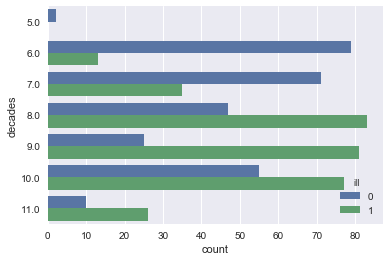

In [3]:
df['decades']=((df['Year'])-1900)/10
df['decades']=df['decades'].round()
df.head()
sns.countplot(y='decades', data=df, hue='ill')

In [5]:
y=df['ill']
X=df.iloc[:,5:7]
bound=int(y.shape[0]*0.7)
X_train=X[:bound]
X_test=X[bound:]
y_train=y[:bound]
y_test=y[bound:]

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=666)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
table=pd.crosstab(y_pred,y_test)#матрица ошибок. В горизонт столбце отложены метки истинных классов
table


ill,0,1
row_0,,
0,63,1
1,4,114


In [7]:
# Вспомогательная функция для генерации точек на всей поверхности scatter plot
def get_grid(X, y, step=0.01):
    x_min, x_max = X.min() - 1, X.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    #print(x_min,x_max)
    return np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))

# Вспомогательная функция которая покрасит всё пространство
def fill_color(clf, X, y, cmap=plt.cm.RdYlBu, proba=True, step=0.01):
    xx, yy = get_grid(X[:,0], X[:,1], step)
    #if proba and hasattr(clf, 'predict_proba'):
     #   predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)
    #else:
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, predicted, cmap=cmap, alpha=.8)

In [8]:
X_test_matr=X_test.as_matrix()

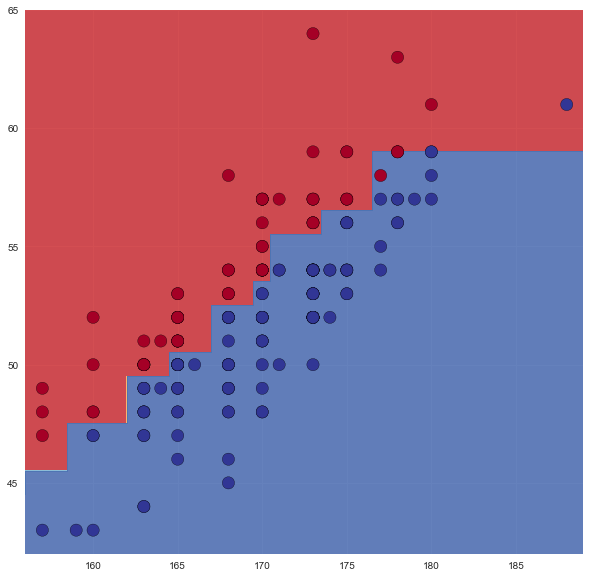

In [9]:
plt.figure(figsize=(10,10))
fill_color(clf, X_test_matr, y_test, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_matr[:,0], X_test_matr[:,1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
table=pd.crosstab(y_pred,y_test)#матрица ошибок. В горизонт столбце отложены метки истинных классов
table

ill,0,1
row_0,,
0,63,3
1,4,112


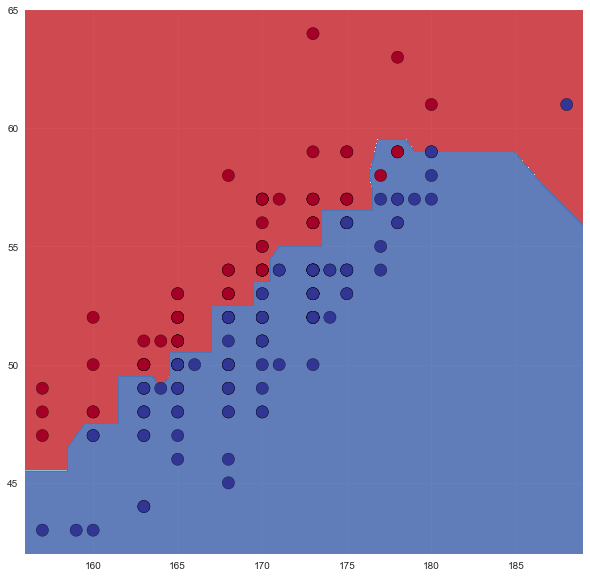

In [11]:
plt.figure(figsize=(10,10))
fill_color(clf, X_test_matr, y_test, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_matr[:,0], X_test_matr[:,1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=150)